In [ ]:
%%capture
!pip install --upgrade pymupdf
!pip install nltk
!pip install networkx
!pip install matplotlib
!pip install Sastrawi


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Import semua library
import pymupdf
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import defaultdict, Counter
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Download NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

In [ ]:
doc = pymupdf.open("data/jurnal.pdf") # open a document
out = open("output.txt", "wb") # create a text output
for page in doc: # iterate the document pages
    text = page.get_text().encode("utf8") # get plain text (is in UTF-8)
    out.write(text) # write text of page
    out.write(bytes((12,))) # write page delimiter (form feed 0x0C)
out.close()

In [6]:
with open('output.txt', 'r', encoding='utf-8') as file:
    teks = file.read()

print(teks[:200])  # tampilkan 200 karakter pertama

Jurnal Farmasi IKIFA 
Vol. 3 No. 3 Oktober 2024 
 
 
Ida, dkk | 121  
 
HUBUNGAN KARAKTERISTIK DEMOGRAFI DENGAN PENGETAHUAN 
MASYARAKAT TENTANG HIV/AIDS  DI RW 02  KELURAHAN PINANG RANTI 
JAKARTA-TIMU


In [ ]:
sentences = nltk.sent_tokenize(teks)
print(sentences)

['Jurnal Farmasi IKIFA \nVol.', '3 No.', '3 Oktober 2024 \n \n \nIda, dkk | 121  \n \nHUBUNGAN KARAKTERISTIK DEMOGRAFI DENGAN PENGETAHUAN \nMASYARAKAT TENTANG HIV/AIDS  DI RW 02  KELURAHAN PINANG RANTI \nJAKARTA-TIMUR \n \nIda Diana Sari1, Nina Rustiana2, Aulia Eka Damayanti3 \n1,2,3Program Studi Farmasi, Sekolah Tinggi Ilmu Kesehatan IKIFA \nEmail : idadiana@ikifa.ac.id \nEmail: ninarustiana@ikifa.ac.id \nEmail: auliaeka.9b@gmail.com \n \nABSTRAK \nHuman Immunodeficiency Virus (HIV) yaitu virus yang menyerang dan melemahkan sistem \npertahanan tubuh manusia, sehingga tubuh mudah tertular berbagai penyakit.', 'Pada akhir tahun \n2022 sebanyak 85,6 juta orang telah terinfeksi virus HIV dan sekitar 40,4 juta orang meninggal \nkarena HIV.', 'Prevalensi orang hidup dengan HIV secara global sebanyak 39,0 juta.', 'Menurut \nLaporan Eksekutif Perkembangan HIV/AIDS dan Penyakit Menular Seksual (PIMS) Triwulan I \ntahun 2023, tercatat 5 Provinsi yang melaporkan kasus HIV tertinggi di Indonesia 

In [ ]:
df = pd.DataFrame(sentences, columns=['kalimat'])
print(df)

                                               kalimat
0                          Jurnal Farmasi IKIFA \nVol.
1                                                3 No.
2    3 Oktober 2024 \n \n \nIda, dkk | 121  \n \nHU...
3    Pada akhir tahun \n2022 sebanyak 85,6 juta ora...
4    Prevalensi orang hidup dengan HIV secara globa...
..                                                 ...
214                 ADIL Indonesia Journal, 2019, 1.1.
215                                                18.
216  Menghilangkan Stigma Pasien HIV/AIDS - FK-KMK ...
217                               [cited 2024 Juli 6].
218  Available from:  https://fkkmk.ugm.ac.id/mengh...

[219 rows x 1 columns]


In [9]:
df.to_csv('kalimat.csv', index=False, encoding='utf-8')

Untuk membuat word graph

Lanjutkan dengan menggunakan https://www.geeksforgeeks.org/nlp/co-occurence-matrix-in-nlp/

In [ ]:
# Baca teks dari paper PDF (output.txt yang sudah diextract sebelumnya)
with open('output.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Preprocess the text - menggunakan stopwords English (sesuaikan jika paper berbahasa Indonesia)
stop_words = set(stopwords.words('english'))
words = word_tokenize(text.lower())
words = [word for word in words if word.isalnum() and word not in stop_words and len(word) > 2]

print(f"Total kata setelah preprocessing: {len(words)}")
print(f"Kata unik: {len(set(words))}")

# Define the window size for co-occurrence
window_size = 2

# Create a list of co-occurring word pairs
co_occurrences = defaultdict(Counter)
for i, word in enumerate(words):
    for j in range(max(0, i - window_size), min(len(words), i + window_size + 1)):
        if i != j:
            co_occurrences[word][words[j]] += 1

# Create a list of unique words
unique_words = list(set(words))

# Initialize the co-occurrence matrix
co_matrix = np.zeros((len(unique_words), len(unique_words)), dtype=int)

# Populate the co-occurrence matrix
word_index = {word: idx for idx, word in enumerate(unique_words)}
for word, neighbors in co_occurrences.items():
    for neighbor, count in neighbors.items():
        co_matrix[word_index[word]][word_index[neighbor]] = count

# Create a DataFrame for better readability
co_matrix_df = pd.DataFrame(co_matrix, index=unique_words, columns=unique_words)

# Display the co-occurrence matrix (sebagian)
print("\nCo-occurrence Matrix (10x10 pertama):")
co_matrix_df.iloc[:10, :10]

Total kata setelah preprocessing: 2489
Kata unik: 721

Co-occurrence Matrix (10x10 pertama):


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\willy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\willy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,positif,daftar,ims,beranggapan,klinik,oleh,125,ditemukan,oktober,studi
positif,0,0,0,0,0,0,0,0,0,0
daftar,0,0,0,0,0,0,0,0,0,0
ims,0,0,0,0,0,0,0,0,0,0
beranggapan,0,0,0,0,0,0,0,0,0,0
klinik,0,0,0,0,0,0,0,0,0,0
oleh,0,0,0,0,0,0,0,0,0,0
125,0,0,0,0,0,0,0,0,0,0
ditemukan,0,0,0,0,0,0,0,0,0,0
oktober,0,0,0,0,0,0,0,0,0,0
studi,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Buat graph dari co-occurrence matrix
arr = co_matrix_df.to_numpy()
G = nx.from_numpy_array(arr)

# Mapping node index ke kata
mapping = {i: word for i, word in enumerate(unique_words)}
G = nx.relabel_nodes(G, mapping)

print(f"Jumlah nodes (kata unik): {G.number_of_nodes()}")
print(f"Jumlah edges (koneksi co-occurrence): {G.number_of_edges()}")

Jumlah nodes (kata unik): 721
Jumlah edges (koneksi co-occurrence): 3140


In [13]:
# Hitung PageRank
pagerank_scores = nx.pagerank(G, alpha=0.85)

# Urutkan berdasarkan skor PageRank (tertinggi ke terendah)
sorted_pagerank = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)

# Tampilkan top 20 kata dengan PageRank tertinggi
print("=" * 50)
print("TOP 20 KATA DENGAN PAGERANK TERTINGGI")
print("=" * 50)
for i, (word, score) in enumerate(sorted_pagerank[:20], 1):
    print(f"{i:2}. {word:20} : {score:.6f}")

# Simpan hasil PageRank ke DataFrame
pagerank_df = pd.DataFrame(sorted_pagerank, columns=['Kata', 'PageRank_Score'])
print(f"\nTotal kata dalam graph: {len(pagerank_df)}")
pagerank_df.head(20)

TOP 20 KATA DENGAN PAGERANK TERTINGGI
 1. hiv                  : 0.025508
 2. yang                 : 0.021140
 3. dan                  : 0.017647
 4. responden            : 0.017409
 5. dengan               : 0.011661
 6. sebanyak             : 0.011025
 7. pengetahuan          : 0.010704
 8. dapat                : 0.008510
 9. jakarta              : 0.007434
10. tidak                : 0.007013
11. kesehatan            : 0.006910
12. penelitian           : 0.006897
13. orang                : 0.006803
14. tahun                : 0.006786
15. hal                  : 0.006745
16. pada                 : 0.006674
17. ini                  : 0.006429
18. kasus                : 0.006336
19. tentang              : 0.006300
20. penyakit             : 0.006273

Total kata dalam graph: 721


,Kata,PageRank_Score
0,hiv,0.025508
1,yang,0.021140
2,dan,0.017647
3,responden,0.017409
4,dengan,0.011661
5,sebanyak,0.011025
6,pengetahuan,0.010704
7,dapat,0.008510
8,jakarta,0.007434
9,tidak,0.007013


C:\Users\willy\AppData\Local\Temp\ipykernel_9500\2939007197.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


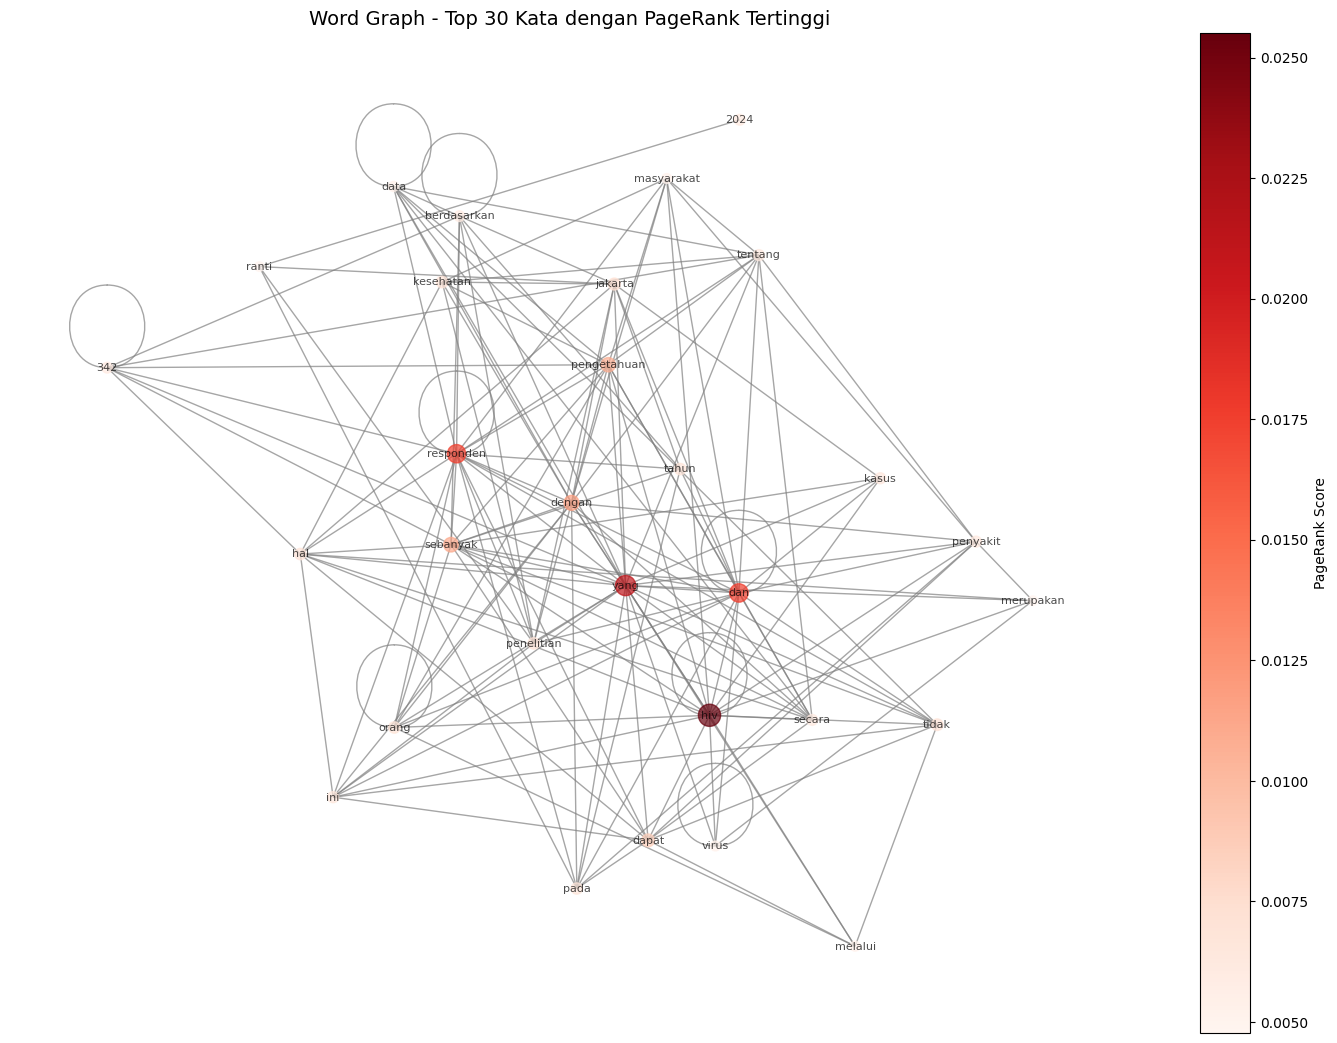

In [ ]:
# Visualisasi graph dengan top 30 kata (untuk keterbacaan)
top_words = [word for word, score in sorted_pagerank[:30]]
subgraph = G.subgraph(top_words)

# Warna node berdasarkan PageRank score
node_colors = [pagerank_scores[node] for node in subgraph.nodes()]
node_sizes = [pagerank_scores[node] * 10000 for node in subgraph.nodes()]

plt.figure(figsize=(14, 10))
pos = nx.spring_layout(subgraph, k=2, iterations=50)
nx.draw(subgraph, pos, 
        with_labels=True, 
        node_color=node_colors, 
        cmap=plt.cm.Reds,
        node_size=node_sizes, 
        font_size=8,
        edge_color='gray',
        alpha=0.7)
plt.title("Word Graph - Top 30 Kata dengan PageRank Tertinggi", fontsize=14)

# Fix colorbar dengan norm dan ax yang benar
sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])
plt.colorbar(sm, ax=plt.gca(), label='PageRank Score')

plt.tight_layout()
plt.show()